# 09. Ciągi i ich własności, granica ciągu

__Tresci kształcenia.__ Ciągi liczbowe: granice właściwe i niewłaściwe. Zbieżność i arytmetyka granic. Ciągi monotoniczne. Podciągi, punkty skupienia i tw. Bolzano-Weierstrassa. Warunek Cauchy'ego i zupełność. Pozostałe informacje o zbieżności ciągów.  Symbole Landaua i obliczanie granic z nimi związanych.

__Efekty kształcenia.__ Student  potrafi wprawnie posługiwać się pojęciem granicy ciągu oraz sprawdzać wykonalność obliczeń na komputerze. Zna podstawowe metody obliczania granic. 

## Ciągi liczbowe

Pojęcie ciągu liczbowego jest jednym z fundamentalnych pojęć matematycznych. Zapewne  czytelnik spotkał się już z nim   w szkole średniej (omawiając na przykład ciągi arytmetyczne i geometryczne). Z formalnego punktu widzenia ciągi liczbowe to nic innego jak funkcje działające ze zbioru liczb naturalnych do zbioru liczb rzeczywistych. Naszym glównym celem podczas tej (i kilku kolejnych lekcji) jest zrozumienie pojęcia granicy ciągu (służy ono do precyzyzjnego opisania tego co się dzieje z wyrazami ciągu dla bardzo dużych indeksów i jest jednym z najważniejszych pojęć analizy matematycznej).

### Definicja ciągu
> Ciągiem liczbowym nazywamy  dowolną funkcję $a\colon\mathbb{N}\to\mathbb{R}$.

__Uwagi:__ 
>* Przyjęło się pisać, że dla każdego $n\in\mathbb{N}$ wartość  $a(n)$ oznacza się symblolem $a_n$ i mówi się, że jest to n - ty wyraz ciągu.
Ciąg  oznacza się zazwyczaj jednym z symboli: $(a_n)$, $(a_n)_{n\in\mathbb{N}}$ lub $(a_n)_{n=1}^\infty$.

>* Istnieją zasadniczo dwa sposoby określania ciągów:
>>* podanie jawnego wzoru pozwalającego "od razu" policzyć jego n-ty wyraz, np. $a_n=2n^2+114$;
>>* podanie wzoru rekurencyjengo (to znaczy takiego, który wymaga  znajomości poprzednich wyrazów aby znaleźć jego  n - ty wyraz), np.

$$
a_1=1, \quad a_2=1 \quad\text{i}\quad a_{n+2}=a_{n+1}+a_n \quad\text{dla}\quad n\in\mathbb{N}.
$$

### Przykład: ciąg zadany wzorem ogólnym

Niech $a_n=2n^2+114.$ Wtedy 

>* $a_1 = 116$;
>* $a_2 = 122$;
>* $a_{100} = 20114$.

### Przykład: ciąg zadany wzorem rekurencyjnym

Niech $a_1=1, a_2=1 $ i $ a_{n+2}=a_{n+1}+a_n$ dla $n\in\mathbb{N}$. Wtedy 

>* $a_3 = a_2+a_1=1+1=2$;
>* $a_4 =a_3+a_2=2+1=3$.

Ile jest równe $a_{100}$?

In [3]:
# Fibbonacci sequnce
def Fib(n):
   
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a+b
        
    return a
print(Fib(100))

354224848179261915075


$a_{100}=354224848179261915075$.

__Uwaga:__ 
> Powyższe przykłady pokazują, że niezwykle użyteczna jest znajomość wzoru ogólnego ciągu (bo szybciej jest znaleźć dowolny jego wyraz). Z kolei w większości problemów informatycznych 
pojawiają się ciągi rekurencyjne. Dlatego też ciągom rekurencyjnym zostanie poświęcona istotna cześć naszego kursu. Dowie się z niej czytelnik na przykład jak w niektórych sytuacjach można od wzoru rekurencyjnego przejść do wzoru ogólnego.


### Przykład nr 1 do samodzielnego rozwiązania

Uruchom poniższy skrypt obliczający setny wyraz ciągu Fibonnacciego. Dlaczego to trwa tak długo?

In [ ]:
# Fibbonacci sequnce
def Fib(n):
   
    if n == 1 or n==2:
         return 1
    else:
        a=Fib(n-1)+Fib(n-2)
        
    return a
print(Fib(100))

### Przykład nr 2  do samodzielnego rozwiązania

Niech $a_n=\frac{n+1}{n+3}$. Wyznacz: $a_1,a_5,a_{100}$.

### Przykład nr 3 do samodzielnego rozwiązania

Niech $(a_n)$ będzie ciągiem określonym rekurencyjnie

$$
a_n= \begin{cases} 
        1 & n=1\\
        a_{n-1}+5,& n>1
      \end{cases}.
$$

Wyznacz $a_2,a_3$ i $a_{100}$. Znajdź wyraz ogólny ciągu i udowodnij go indukcyjnie.

## Monotoniczność i ograniczoność ciągu 

### Definicja ciągu monotonicznego

>* Ciąg $(a_n)$ nazywamy:
>>*   rosnącym, gdy dla każdego $n\in\mathbb{N}$ mamy $a_{n+1} > a_n$;
>>*   malejącym, gdy dla każdego $n\in\mathbb{N}$ mamy $a_{n+1} < a_n$;
>>*   nierosnącym, gdy dla każdego $n\in\mathbb{N}$ mamy $a_{n+1} \leq a_n$;
>>*   niemalejącym, gdy dla każdego $n\in\mathbb{N}$ mamy $a_{n+1} \geq a_n$;
>>* monotoczninym, gdy jest rosnący, malejący, nierosnący lub niemalejący.

__Uwaga__
>* Ciąg $a_n=(-1)^n$ nie jest ani rosnący, ani malejący, ani nierosnący, ani niemalejący.
>* To, że ciąg nie jest rosnący nie oznacza, że ciąg ten jest nierosnący!
>* W literaturze można też spotkać definicję ciągów monotonicznych od pewnego miejsca. Dla przykładu ciąg rosnący od pewnego miejsca to taki ciąg 
$(a_n)$, że nierówność $a_{n+1} > a_n$ jest prawdziwa dla wszystkich $n$ większych od pewnej liczby $n_0$.

### Przykład: ciąg rosnący

Zbadamy monotoniczność ciągu  określonego wzorem

$$
a_n=n^2+14n+1.
$$

Dla wszystkich $n\geq 1$ mamy

$$ 
a_{n+1}-a_n = (n+1)^2+14(n+1)+1-n^2-14n-1 = 2n+15 > 0.
$$

Zatem ciąg $(a_n)$ jest rosnący. 

### Przykład nr 4 do samodzielnego rozwiązania

Zbadaj monotoniczność ciągu 

$$
a_n=\frac{1}{n^2+n}.
$$

### Przykład: ciąg malejący

Zbadamy monotoniczność ciągu  określonego wzorem

$$
a_n=\frac{8^n}{n^3}.
$$

Mamy

$$
\frac{a_{n+1}}{a_n}=\frac{8^{n+1}}{(n+1)^3}\cdot\frac{n^3}{8^n}=8\left(\frac{n}{n+1}\right)^3=8\left(1-\frac{1}{n+1}\right)^3\geq 1.
$$

Zatem ciąg $(a_n)$ jest niemalejący. W istocie, to jest on rosnący od pewnego miejsca (bo powyższa nierówność jest ostra dla $n\geq 2$).

### Przykład nr 5  do samodzielnego rozwiązania

Zbadaj monotoniczność ciągu 

$$
a_n=\frac{2^n}{n}.
$$

### Przykład: monotoniczność ciągu rekurencyjnego

Niech $(a_n)$ będzie ciągiem określonym rekurencyjnie

$$
a_1= \sqrt{2}, \quad a_{n+1}=\sqrt{2+a_{n}}.
$$

Pokażemy, że jest on rosnący. W tym celu zastosujemy zasadę indukcji matematycznej i pokażemy, że dla każdego $n\geq 1 $ mamy 

$$
a_{n+1} > a_n.
$$

Jest to jasne dla $n=1$, bo $a_1=\sqrt{2}<\sqrt{2+\sqrt{2}}=a_2$ (pierwiastek jest funkcją rosnącą).
Przypuśmy teraz, że 

$$
a_{n+1} > a_n
$$

dla pewnego $n$. Wtedy 
 
$$
\sqrt{2+a_{n+1}} > \sqrt{2+a_n},
$$

bo pierwiastek jest fukcją rosnącą. Ale to pokazuje, że 

$$
a_{n+2} > a_{n+1}.
$$


### Definicja ciągu ograniczonego

>* Ciąg $(a_n)$ nazywamy ograniczonym, gdy istnieje $M>0$ takie, że $|a_n|\leq M$ dla wszystkich $n\in\mathbb{N}$.

__Uwaga:__

Powinno być jasne, że ciąg $(a_n)$ jest ograniczony wtedy i tylko, gdy istnieją takie liczby $a$ oraz $b$, że $a\leq a_n\leq b$ dla wszystkich $n\in\mathbb{N}$.

### Przykład ciągu ograniczonego

Ciąg $a_n=(-1)^n +\frac{1}{n+1}$
jest ograniczony ponieważ dla każdego $n\in\mathbb{N}$ mamy

$$
-1\leq (-1)^n +\frac{1}{n+1}\leq 2
$$

### Przykład ciągu nieograniczonego

Ciąg $a_n=n^2-n$.
 nie jest ograniczony ponieważ dla każdego $n\geq 2$ mamy

$$
n^2-n=n(n-1)\geq n.
$$

### Przykład: różnica pierwiastków

Zbadamy ograniczoność ciągu $a_n=\sqrt{n+1}-\sqrt{n}$.

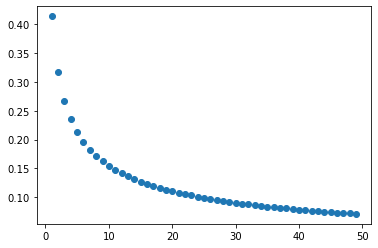

In [1]:
import matplotlib.pyplot as plt
import math   
x = range(1, 50,1)
y = [math.sqrt(n+1)-math.sqrt(n) for n in range(1, 50,1)]
plt.scatter(x, y)
plt.show()

Powyższy wykres sugeruje, że nasz ciąg jest ograniczony (co więcej sugeruje, że jego wyrazy zbliżają się coraz bardziej do zera).
Mamy

$$
\sqrt{n+1}-\sqrt{n}=\left(\sqrt{n+1}-\sqrt{n}\right)\cdot \frac{\sqrt{n+1}+\sqrt{n}}{\sqrt{n+1}-\sqrt{n}}
=\frac{1}{\sqrt{n+1}+\sqrt{n}}.
$$

Zatem dla każdego $n\in\mathbb{N}$

$$
0\leq \sqrt{n+1}-\sqrt{n}\leq 1.
$$

### Przykład: ograniczoność ciągu rekurencyjnego
Niech $(a_n)$ będzie ciągiem określonym rekurencyjnie

$$
a_1= \sqrt{2}, \quad a_{n+1}=\sqrt{2+a_{n}}.
$$

Czy jest to ciąg ograniczony? Na mocy jednego z poprzednich przykładów wiemy już, że jest to ciąg rosnący. Zatem $a_n\geq a_1$ dla wszystkich $n\in\mathbb{N}$.

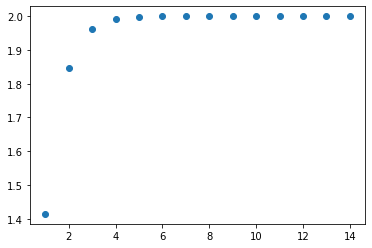

In [2]:
def a(n):
    if n == 1:
         return math.sqrt(2)
    else:
         b =  math.sqrt(2+a(n-1))
    return b
    
import matplotlib.pyplot as plt
import math   
x = range(1, 15,1)
y = [a(n) for n in range(1, 15,1)]
plt.scatter(x, y)
plt.show()

Początkowe wyrazy sugerują, że wyrazy naszego ciągu nie przekroczą $2$. Spóbujemy zatem pokazać indukcyjnie, że 
$a_n\leq 2$ dla wszystkich $n\in\mathbb{N}$.

Jest to prawda dla $n=1$, bo 

$$
a_1=\sqrt{2}\leq 2.
$$

Przypuśmy zatem, że $a_n\leq 2$ dla pewnego $n\in\mathbb{N}$.

Wtedy 

$$
a_{n+1}=\sqrt{2+a_n}\leq \sqrt{2+2}=4.
$$

To kończy dowód indukcyjny.

### Przykład nr 6  do samodzielnego rozwiązania

Uzasadnij, że ciąg

$$
a_n=\frac{n^2+n}{n^3+1}
$$

jest ograniczony.

### Przykład nr 7 do samodzielnego rozwiązania

Uzasadnij, że ciąg

$$
a_n=(-1)^n(\sin (n)+\cos(n))
$$

jest ograniczony.

## Granica ciągu

Wykres pierwszych $50$ wyrazów ciągu 

$$
a_n=\frac{1}{n}
$$

sugeruje, że  wraz ze wzostem indeksu wyrazy tego ciągu znajdują się coraz bliżej zera.

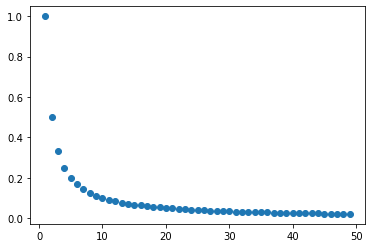

In [3]:
import matplotlib.pyplot as plt
import math   
x = range(1, 50,1)
y = [1/n for n in range(1, 50,1)]
plt.scatter(x, y)
plt.show()

Wykres pierwszych $50$ wyrazów ciągu 

$$
a_n=\frac{2n+3}{n+1}
$$

sugeruje, że  wraz ze wzostem indeksu wyrazy tego ciągu znajdują się coraz bliżej 2.

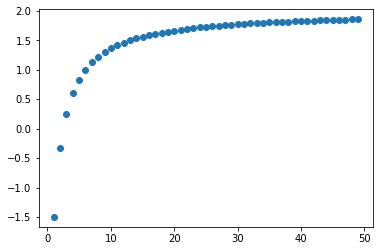

In [4]:
import matplotlib.pyplot as plt
import math   
x = range(1, 50,1)
y = [(2*n-5)/(n+1) for n in range(1, 50,1)]
plt.scatter(x, y)
plt.show()

Wykres pierwszych $1000$ wyrazów ciągu 

$$
a_n=1+\frac{(-1)^n}{\sqrt{n}}
$$
sugeruje, że  wraz ze wzostem indeksu wyrazy tego ciągu koncentrują się blisko 1.

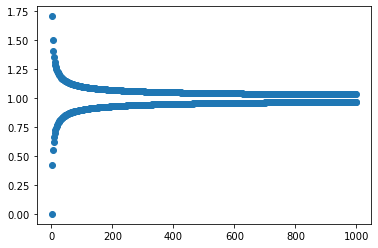

In [5]:
import matplotlib.pyplot as plt
import math   
x = range(1, 1000,1)
y = [1+(-1)**n/math.sqrt(n) for n in range(1, 1000,1)]
plt.scatter(x, y)
plt.show()

Wprowadzimy teraz bardzo ważną definicję granicy ciągu.

### Definicja ciągu zbieżnego

> Ciąg $(a_n)_{n\in\mathbb{N}}$ nazywamy zbieżnym do liczby $g$, gdy dla każdego $\varepsilon>0$ istnieje takie $N$, że dla każdego 
$n\geq N$ mamy

$$
|a_n-g| < \varepsilon.
$$

>Piszemy wtedy, że  $\displaystyle\lim_{n\to_\infty}a_n=g$ lub $a_n\xrightarrow{n\to\infty}g$. Jeśli ciąg $(a_n)$ jest zbieżny do pewnej liczby $g$, to nazywamy go ciągiem zbieżnym.


__Uwagi:__ 

>* używając symloli logicznych można powyższą definicję wyrazić następująco:

$$
\lim_{n\to_\infty}a_n=g \Leftrightarrow \forall_{\varepsilon > 0}\exists_{N}\forall_{n\geq N} |a_n-g| < \varepsilon.
$$

>* to, że liczba $g$ jest granicą ciągu $a_n$ oznacza, że dla każdego $\varepsilon>0$  w przedziale $(g-\varepsilon,g+\varepsilon)$ znajdują się prawie wszystkie wyrazy ciągu $a_n$.
Dzięki tej obserwacji łatwo zobaczyć, że granica ciągu wyznaczona jest jednoznacznie. Widać też, że ciąg $(-1)^n$ nie jest zbieżny do żadnej liczby $g$.

### Przykład ciągu zbieżnego do zera

Pokażemy wprost z definicji,  że 

$$
\lim_{n\to\infty} \frac{1}{n}=0.
$$

> W tym celu ustalmy ___dowolny___ $\varepsilon>0$.  Musimy zrozumieć dla których liczb naturalnych $n$ spłeniona jest nierówność

$$
\left|\frac{1}{n}-0\right| < \varepsilon.
$$

>Proste przekszatałcenia dają, że nierówność ta jest prawdziwa dla wszystkich liczb $n$ spełniających nierówność

$$
n>\frac{1}{\varepsilon}.
$$

Zatem dla każdego $\varepsilon > 0$: jeśli $n > \frac{1}{\varepsilon}$, to $\left|\frac{1}{n}-0\right| < \varepsilon$. To pokazuje, że nasz ciąg jest zbieżny do zera.